In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pickle

In [2]:
# Check that TF version (2.1.0 - 2.3.2 should be fine)
print(tf.__version__)

2.1.0


# For turn-in move all answers to questions and requested plots to top of notebook or this will not be graded. Also make a final clean run of your code so the cells execute in order.

### Points awarded for correct working models, questions, and plots.

[+10 per model correct and working -5 for failure on either]

**1.1 Answer the following questions:**
1.   Explain the indication of overfitting and how this occurs (provide plot supporting your answer)? [+4 answer, +4 plot, +2 answer and plot agree]

Overfitting occurs when a model is trained to closely to a specific dataset that it doesn't generalize well to test data that isn't as similar. One indication is when training loss decreases extensively while validation loss increases. Inversely, when training accuracy is very high, while validation accuracy is low, overfitting has likely occured.

We trained a CNN. Our training and validation loss and accuracy is plotted against epochs in the figures shown below. This is an example of overfitting because after 10 epochs, training loss stays close to 0, but validation loss is increasing. 

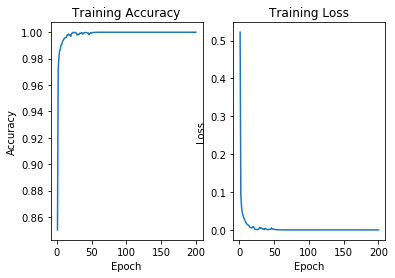

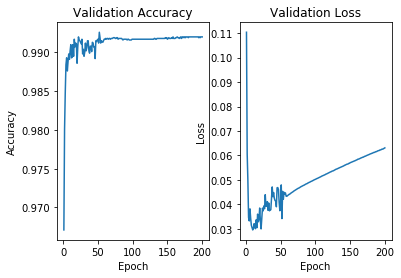

2.   Explain how overfit can hinder performance of a model when deployed. [+6 answer]

An overfitted model will perform poorly because it doesn't generalize well to new data. Data is much more noisy, random, and unprocessed in real-life applications.

3.   Name two ways to avoid this. [+2 answer, +2 answer]

One way to avoid overfitting is to add dropout layers to a network's archiecture. Dropout layers randomly pick features to delete during training which prevents the model from relying too heavily on certain data features.

Another method is to stop training earlier by decreasing the number of epochs. Having extremely low loss is not always optimal as it is a possible sign of overfitting. Even better is to dynamically stop training when validation loss begins to rise.

**1.2 Answer the following question:** 
 1.   Explain how dropout affected your loss (provide plot supporting your answer). [+5 answer, +5 plot]
 
 Below are our loss plots when adding one 30% dropout layer between the input and first hidden layer. Already, it eliminates most of the overfitting shown in our results in Section 1.1. Validation loss is only increasing slightly which is a decrease in validation loss.
 
 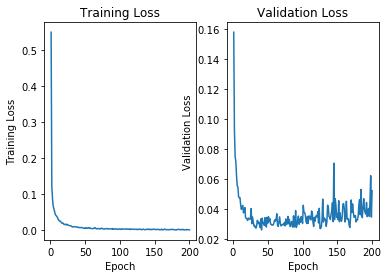

To further improve our results, we add 30% dropout layers between every layer except after the input layer and before the output layer. This eliminates ovefitting such that it is no longer noticeable. The validation loss is fairly constant and not increasing.

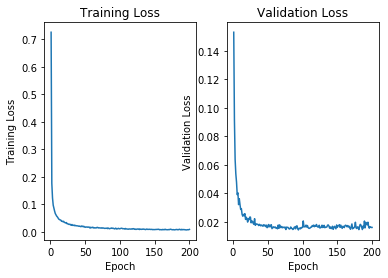

**Bonus Answer the following question:**
    
  1. Considering that encoder and decoder can be constructed as separate components, trained as a single unit, and then separated for use . What uses can you brainstorm?  [+5 bonus makeup points]
  
Encoders and decoders can be used for minimizing the size of data packets as a form of compression such as signals or video from a remote rover or drone. It could also be used to increase communication speed over telephone.

**2.1 Linear AE points for constructed model, no questions here.**

The figure below shows the training and validation loss of the vanilla autoencoder.

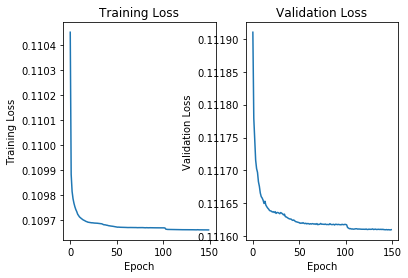

We visualize the encoder and decoder results on sample MNIST data.

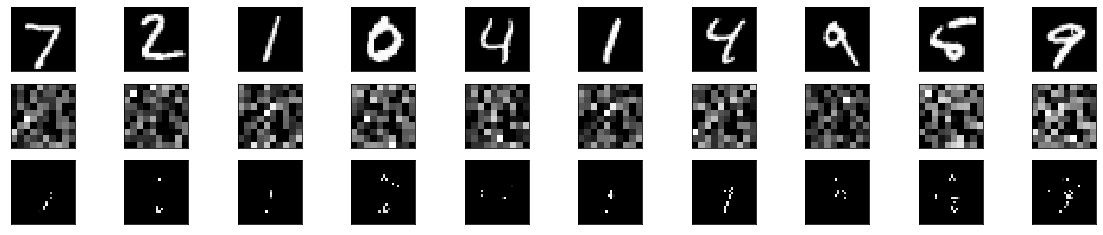

**2.2 Convolutional AE points for constructed model, no questions here.**

The figure below shows the training and validation loss of the convolutional autoencoder.

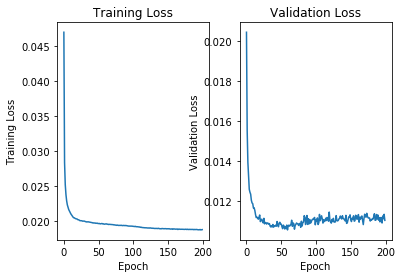

We visualize the encoder and decoder results on sample MNIST data.

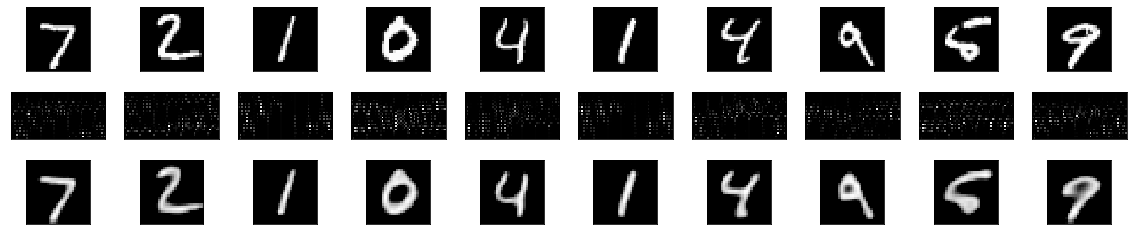

**2.3 Report histogram plot, mean and std. dev. of normal data, and confusion matrix for 2 standard deviations as results. Discuss your loss plot.** [+10 for greater than 75 TP, +10 all else]

The figure below shows the training and validation loss of the convolutional autoencoder trained to detect anomalies in vibration data from a machine pump. There appears to be no overfitting as training and validation loss continue decreasing indefinitely. Hence, the model is improving. This makes sense when because our model outperforms the baseline model by finding 79 of the 143 anomalies. 

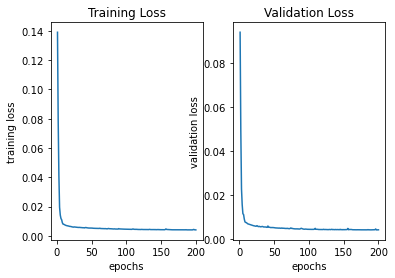

Next, we plotted our histogram plot where blue bars are normal data MSE and orange bars are anomaly data MSE. For the normal data, the red-dotted line is the mean and the black-dotted lines are the standard deviation boundaries.

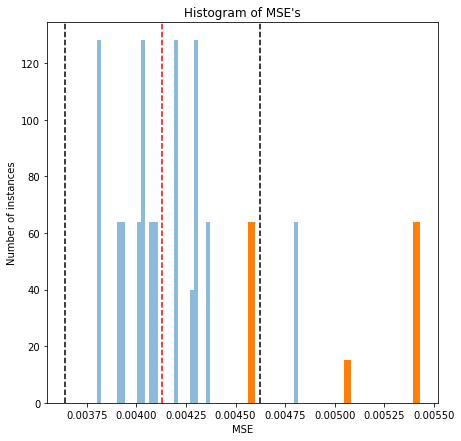

The resulting confusion matrix shows true positives, true negatives, false positive, and false negatives. Our true positive count shows 79 anomalies are detected correctly.

$$\begin{bmatrix} TP \ 79 & TN \ 64 \\ FP \ 936 & FN \ 64 \end{bmatrix}$$

***Reminder: Achieve better than 75 anomalies***

In [3]:
#Import dataset and normalize to [0,1]
fashion_mnist = tf.keras.datasets.mnist
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
#Normalize
data_train = data_train / 255
data_test = data_test / 255
#Reshape
data_train = data_train.reshape(60000,28,28,1)
data_test = data_test.reshape(10000,28,28,1)

#Create labels as one-hot vectors
labels_train = tf.keras.utils.to_categorical(labels_train, num_classes=10)
labels_test = tf.keras.utils.to_categorical(labels_test, num_classes=10)

# Section 1 - CNN's

Fill in the model:
* Input: 28x28x1 grayscale image (1 specifies single channel grayscale).
* 1st hidden: 2D convolutional layer with 256 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 128 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: Flatten layer to map 2D to 1D vector.
* 6th hidden: Dense layer of 100 perceptrons.
* 7th hidden: Dense layer of 100 perceptrons.
* Output: 10 perceptrons for classification.
<br>**Activations, bias, loss function, and optimizer are your choice.
<br>  Train for 200 epochs**

## 1.1 Overfitting 

In [4]:
#Create and train model architecture
def CNN_overfit():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(28,28,1)),
        tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    return model

#Compile and train the model
epoch_count = 200
CNN_overfit = CNN_overfit()
CNN_overfit.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_overfit = CNN_overfit.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=epoch_count, batch_size=1000, shuffle=True)
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 6s 99us/sample - loss: 0.5222 - acc: 0.8502 - val_loss: 0.1104 - val_acc: 0.9671
Epoch 2/200
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0958 - acc: 0.9712 - val_loss: 0.0608 - val_acc: 0.9801
Epoch 3/200
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0621 - acc: 0.9807 - val_loss: 0.0498 - val_acc: 0.9848
Epoch 4/200
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0473 - acc: 0.9857 - val_loss: 0.0346 - val_acc: 0.9884
Epoch 5/200
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0400 - acc: 0.9872 - val_loss: 0.0333 - val_acc: 0.9893
Epoch 6/200
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0329 - acc: 0.9899 - val_loss: 0.0382 - val_acc:

In [5]:
# Information contained in history dict.
print(history_overfit.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Text(0, 0.5, 'Loss')

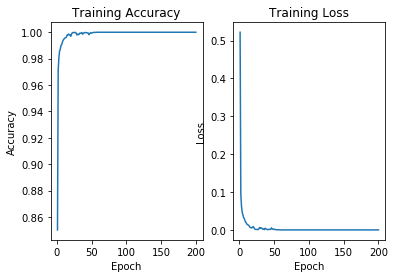

In [6]:
epoch_increments = np.arange(1,epoch_count+1)

#Plot training accuracy vs epoch
plt.subplot(121)
plt.plot(epoch_increments, history_overfit.history['acc'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

#Plot training loss vs epoch
plt.subplot(122)
plt.plot(epoch_increments,history_overfit.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

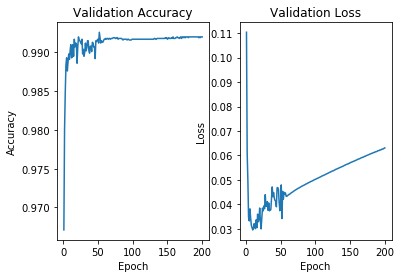

In [7]:
epoch_increments = np.arange(1,epoch_count+1)

#Plot val accuracy vs epoch
plt.subplot(121)
plt.plot(epoch_increments, history_overfit.history['val_acc'])
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

#Plot val loss vs epoch
plt.subplot(122)
plt.plot(epoch_increments,history_overfit.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

## 1.2 Improvements 

Using the network above, (1) insert a dropout of 30% between the input and first hidden layer. Run the model again and make note of the result. Next, (2 ) remove the dropout between input and hidden and add a dropout to each hidden layer except between softmax and output layer. Plot accuracy and loss only for (2). 

In [29]:
#Test 1: Create and train model architecture
def CNN_dropout_hidden():

    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(28,28,1)),
        tf.keras.layers.Dropout(0.3), # keep for test1
        tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return model

#Compile and train the model
epoch_count = 200
CNN_dropout_hidden = CNN_dropout_hidden()
CNN_dropout_hidden.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout_hidden = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=epoch_count, batch_size=1000, shuffle=True)
scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 5s 76us/sample - loss: 0.5482 - acc: 0.8342 - val_loss: 0.1579 - val_acc: 0.9586
Epoch 2/200
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1208 - acc: 0.9629 - val_loss: 0.0925 - val_acc: 0.9757
Epoch 3/200
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0888 - acc: 0.9722 - val_loss: 0.0750 - val_acc: 0.9809
Epoch 4/200
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0670 - acc: 0.9792 - val_loss: 0.0716 - val_acc: 0.9820
Epoch 5/200
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0598 - acc: 0.9811 - val_loss: 0.0622 - val_acc: 0.9818
Epoch 6/200
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0514 - acc: 0.9839 - val_loss: 0.0554 - val_acc: 0.9861
Epoch 7/200
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0440 - acc: 0.9864 - val_l

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Text(0, 0.5, 'Validation Loss')

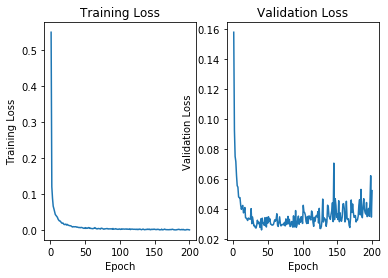

In [30]:
print(history_dropout_hidden.history.keys())
epoch_increments = np.arange(1,epoch_count+1)

#Plot train loss vs epoch
plt.subplot(121)
plt.plot(epoch_increments, history_dropout_hidden.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

#Plot validation loss vs epoch
plt.subplot(122)
plt.plot(epoch_increments, history_dropout_hidden.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')

In [31]:
#Test 2: Create and train model architecture
def CNN_dropout_hidden():
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(28,28,1)),
        tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        tf.keras.layers.Dropout(0.3), # keep for test2
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.Dropout(0.3), # keep for test2
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.3), # keep for test2
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3), # keep for test2
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dropout(0.3), # keep for test2
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dropout(0.3), # keep for test2
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return model

#Compile and train the model
epoch_count = 200
CNN_dropout_hidden = CNN_dropout_hidden()
CNN_dropout_hidden.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout_hidden = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=epoch_count, batch_size=1000, shuffle=True)
scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 8s 129us/sample - loss: 0.7258 - acc: 0.7611 - val_loss: 0.1530 - val_acc: 0.9679
Epoch 2/200
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1765 - acc: 0.9491 - val_loss: 0.0916 - val_acc: 0.9806
Epoch 3/200
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1232 - acc: 0.9647 - val_loss: 0.0638 - val_acc: 0.9845
Epoch 4/200
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0969 - acc: 0.9726 - val_loss: 0.0537 - val_acc: 0.9875
Epoch 5/200
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0859 - acc: 0.9753 - val_loss: 0.0479 - val_acc: 0.9888
Epoch 6/200
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0751 - acc: 0.9785 - val_loss: 0.0391 - val_acc: 0.9896
Epoch 7/200
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0663 - acc: 0.9801 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Text(0, 0.5, 'Validation Loss')

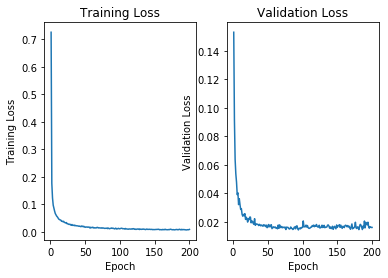

In [32]:
print(history_dropout_hidden.history.keys())
epoch_increments = np.arange(1,epoch_count+1)

#Plot train loss vs epoch
plt.subplot(121)
plt.plot(epoch_increments, history_dropout_hidden.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

#Plot validation loss vs epoch
plt.subplot(122)
plt.plot(epoch_increments, history_dropout_hidden.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')

# Section 2- Autoencoders

## 2.1 Linear AE 

Fill in the model:
* Input: Flattened grayscale image to 28^2 = 784-dimensional vector.
* 1st hidden: 400 perceptrons.
* 2nd hidden: 200 perceptrons.
* 3rd hidden: 100 perceptrons.
* 4th hidden: 200 perceptrons.
* 5th hidden: 400 perceptrons.
* Output: 784 perceptrons.
<br>**Activations, bias, loss function, and optimizer are your choice.
<br> Train for 150 epochs**

In [6]:
#Reshape training and testing data
data_train_reshape_fcae = data_train.reshape(60000,784)
data_test_reshape_fcae = data_test.reshape(10000,784)

In [7]:
# Create autoencoder architecture
def deep_ae():
    model = tf.keras.models.Sequential([
    
        # Encoder
        tf.keras.layers.InputLayer(input_shape=(784)),
        tf.keras.layers.Dense(400, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),

        # Decoder
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(400, activation='relu'),
        tf.keras.layers.Dense(784, activation='softmax')
    ])
    
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
epoch_count = 150
deep_ae = deep_ae()
deep_ae.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
history_deep_ae = deep_ae.fit(data_train_reshape_fcae, data_train_reshape_fcae, validation_data=(data_test_reshape_fcae, data_test_reshape_fcae), epochs=epoch_count, batch_size=250, shuffle=True)
decoded_data = deep_ae.predict(data_test_reshape_fcae)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output])
deep_ae_hl = get_hl([data_test_reshape_fcae])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1105 - val_loss: 0.1119
Epoch 2/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1099 - val_loss: 0.1118
Epoch 3/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1098 - val_loss: 0.1117
Epoch 4/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1098 - val_loss: 0.1117
Epoch 5/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1098 - val_loss: 0.1117
Epoch 6/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1098 - val_loss: 0.1117
Epoch 7/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1097 - val_loss: 0.1117
Epoch 8/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1097 - val_loss: 0.1117
Epoch 9/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.10

Text(0, 0.5, 'Validation Loss')

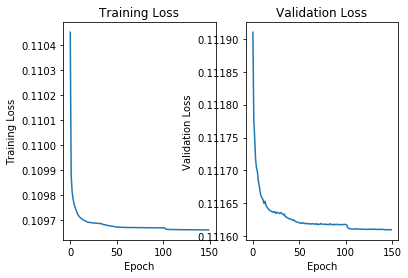

In [9]:
epoch_increments = np.arange(epoch_count)

#Plot train loss vs epoch
plt.subplot(121)
plt.plot(epoch_increments,history_deep_ae.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

#Plot validation loss vs epoch
plt.subplot(122)
plt.plot(epoch_increments,history_deep_ae.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')

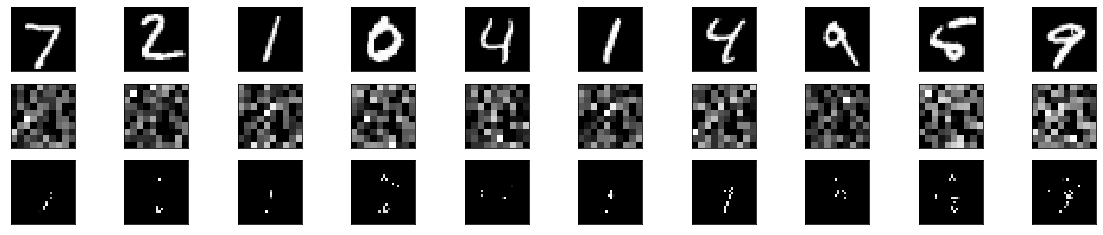

In [10]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_fcae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.2 Convolutional AE 

Fill in the model:
* Input: 28x28x1 grayscale image.
* 1st hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 6th hidden: A 2x2 upsample layer.
* 7th hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 8th hidden: A 2x2 upsample layer.
* Output: A convolutional layer with a single feature map and 3x3 filters.
<br>**Activations, dropout placement, bias , loss function, and optimizer are your choice.
<br>  Set the dropout rate at 30% if the dropout layer is used (optional, not required).
<br>  Train for 200 epochs**

In [12]:
#Reshape data to account for grayscale channel in each image
data_train_reshape_cae = data_train.reshape(60000,28,28,1)
data_test_reshape_cae = data_test.reshape(10000,28,28,1)

In [20]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = tf.keras.models.Sequential([
        
        #Encoder
        tf.keras.layers.InputLayer(input_shape=(28,28,1)),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.3),
        
        #Decoder
        tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D(size=(2,2)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D(size=(2,2)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(1, (3,3), activation='relu', padding='same')
    ])
        
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
epoch_count = 200
conv_ae = cae()
print(conv_ae.summary())
conv_ae.compile(loss='mean_squared_error', optimizer='adam')
history_conv_ae = conv_ae.fit(data_train_reshape_cae, data_train_reshape_cae, validation_data=(data_test_reshape_cae, data_test_reshape_cae), epochs=epoch_count, batch_size=250, shuffle=True)
decoded_data = conv_ae.predict(data_test_reshape_cae)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
conv_ae_hl = get_hl([data_test_reshape_cae])[0]

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 7, 7, 8)          

Text(0, 0.5, 'Validation Loss')

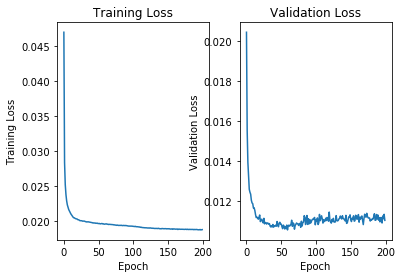

In [22]:
epoch_increments = np.arange(epoch_count)

#Plot train loss vs epoch
plt.subplot(121)
plt.plot(epoch_increments,history_conv_ae.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

#Plot validation loss vs epoch
plt.subplot(122)
plt.plot(epoch_increments,history_conv_ae.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')

<Figure size 432x288 with 0 Axes>

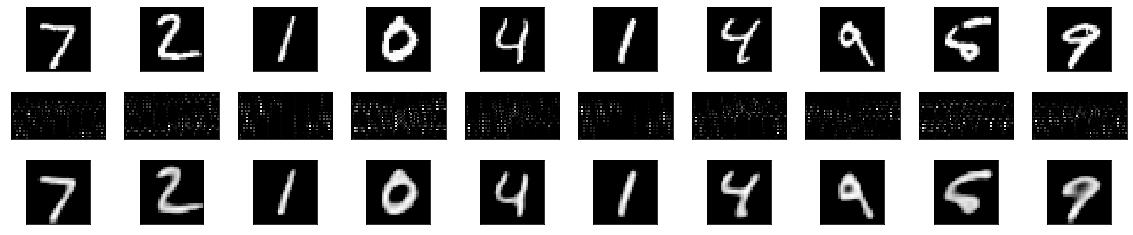

In [25]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_cae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(conv_ae_hl[i].reshape(28, 56))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.3 Machine Anomaly Detection

Using the dataset provided **create the autoencdoer model** you deem necessary to achieve better than 75 true positives (TP = 75) where a true instance is an anomaly.
Or detect all 143 if you can! Although anomaly 
detection thresholds can be set arbitrarily and various metrics
are used depending on the problem, we will set ours at 2 
standard deviations from the mean of "normal" data to judge TP's. Use the code provided at the bottom for calculating true positives and histogramming. 

In [1]:
#### Restart your kernal and run from here to clear some memory
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
tf.keras.backend.set_floatx('float64')

import sys
from os import listdir
from os.path import isfile, join

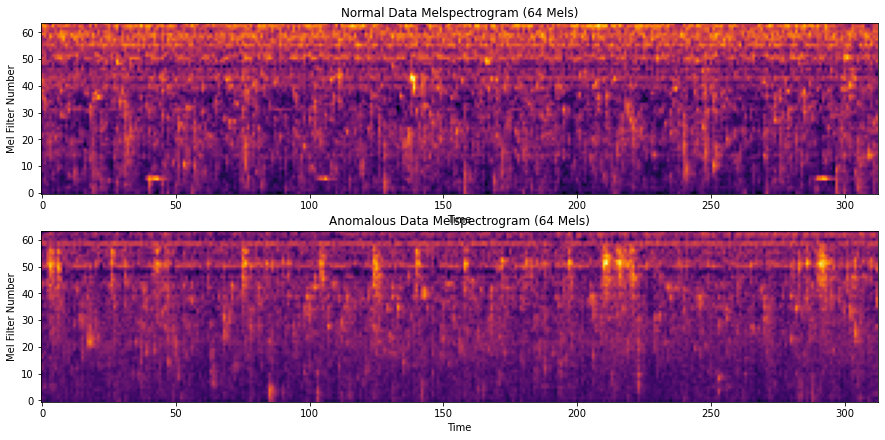

In [2]:
#### Load melspectrograms
# ex_norm  = np.load('./HW2_Anomaly_Data/data/ex_normalspec.npy')
# ex_anom = np.load('./HW2_Anomaly_Data/data/ex_abnormspec.npy')

ex_norm  = np.load('./ex_normalspec.npy')
ex_anom = np.load('./ex_abnormspec.npy')

plt.figure(figsize=(15,7))
plt.subplot(211)
plt.imshow(ex_norm[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Normal Data Melspectrogram (64 Mels)') 

plt.subplot(212)
plt.imshow(ex_anom[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Anomalous Data Melspectrogram (64 Mels)') 
plt.show()

In [3]:
print(ex_norm.shape)

(8, 64, 313)


In [9]:
# Create your own Baseline autoencoder
# Model name is fixed for use by later code

autoencoderBASE = tf.keras.models.Sequential([
        
    #Encoder
    tf.keras.layers.InputLayer(input_shape=(64,313,8)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    #Decoder
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D(size=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D(size=(2,2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D(size=(2,2)),
    tf.keras.layers.ZeroPadding2D(padding=((0,0),(0,1))),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')
])


In [10]:
autoencoderBASE.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 313, 16)       1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 156, 16)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 156, 32)       4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 78, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 78, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 39, 64)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 39, 64)        

In [11]:
# Load data
# normal_data  = np.load('./HW2_Anomaly_Data/data/training_data.npy')
# anomaly_data = np.load('./HW2_Anomaly_Data/data/test_data.npy')

normal_data  = np.load('./training_data.npy')
anomaly_data = np.load('./test_data.npy')

data_max = normal_data.max()
data_min = normal_data.min()

normal_data = (normal_data - data_min) / (data_max - data_min)
anomaly_data = (anomaly_data - data_min) / (data_max - data_min)

validation_data = normal_data[0:200,:,:,:]
normal_data = normal_data[200:1000,:,:,:]

In [12]:
print(normal_data.shape)
print(validation_data.shape)
print(anomaly_data.shape)

(800, 8, 64, 313)
(200, 8, 64, 313)
(143, 8, 64, 313)


In [13]:
#### General steps to follow

# Set up the data (reshape, scale, etc...
#x_train = x_train.reshape(60000,28,28,1)
#x_valid = x_valid.reshape(10000,28,28,1)

# normal_data = np.reshape(800,64,313,8)
# validation_data = np.reshape(200,64,313,8)
# anomaly_data = np.reshape(143,64,313,8)

normal_data = np.moveaxis(normal_data,[0,1,2,3],[0,3,1,2])
validation_data = np.moveaxis(validation_data,[0,1,2,3],[0,3,1,2])
anomaly_data = np.moveaxis(anomaly_data,[0,1,2,3],[0,3,1,2])

# Initialize a loss function
# Compile a model
EPOCHS = 200
baseline_ae = autoencoderBASE
baseline_ae.compile(loss='mean_squared_error', optimizer='adam')

# Train a model
history_baseline_ae = baseline_ae.fit(normal_data, normal_data, validation_data=(validation_data, validation_data), epochs=EPOCHS, batch_size=250, shuffle=True)
decoded_data = baseline_ae.predict(validation_data)

Epoch 1/200
4/4 [==============================] - 227s 45s/step - loss: 0.1511 - val_loss: 0.0942
Epoch 2/200
4/4 [==============================] - 4s 897ms/step - loss: 0.0841 - val_loss: 0.0493
Epoch 3/200
4/4 [==============================] - 4s 908ms/step - loss: 0.0439 - val_loss: 0.0227
Epoch 4/200
4/4 [==============================] - 4s 951ms/step - loss: 0.0205 - val_loss: 0.0155
Epoch 5/200
4/4 [==============================] - 4s 915ms/step - loss: 0.0147 - val_loss: 0.0114
Epoch 6/200
4/4 [==============================] - 4s 1s/step - loss: 0.0118 - val_loss: 0.0110
Epoch 7/200
4/4 [==============================] - 4s 981ms/step - loss: 0.0112 - val_loss: 0.0089
Epoch 8/200
4/4 [==============================] - 4s 1s/step - loss: 0.0091 - val_loss: 0.0077
Epoch 9/200
4/4 [==============================] - 4s 930ms/step - loss: 0.0081 - val_loss: 0.0074
Epoch 10/200
4/4 [==============================] - 4s 1s/step - loss: 0.0079 - val_loss: 0.0073
Epoch 11/200
4/4 [

In [14]:
decoded_data = baseline_ae.predict(validation_data)

Text(0, 0.5, 'validation loss')

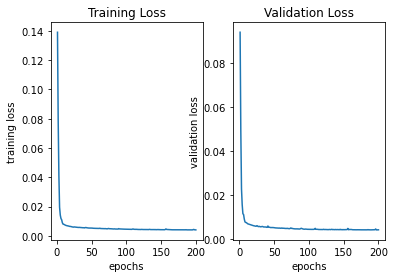

In [15]:
# Plot loss versus epoch.
#Plot validation accuracy/loss vs epoch

plt.subplot(1,2,1)

epoch_list = np.arange(1,EPOCHS+1)
#print(epoch_list)

plt.plot(epoch_list,history_baseline_ae.history['loss'])
plt.title('Training Loss')
plt.xlabel('epochs')
plt.ylabel('training loss')

#Plot loss vs epoch

plt.subplot(1,2,2)

plt.plot(epoch_list,history_baseline_ae.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('epochs')
plt.ylabel('validation loss')

The mean of normal data is 0.0041        and standard deviation is 0.0002


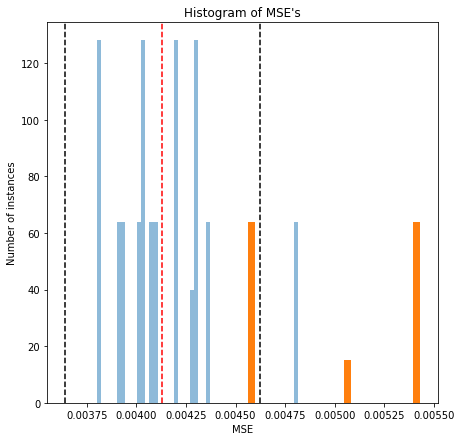

In [16]:
######### This code should remain untouched or autograder will 
######### give zero points.
#### Feed your data through to get mean and std
#### If you did not use a validation set then only use
#### your training data. Concatenating is therefore un-needed.
loss_list = []
# Combine train and validation data and get MSE's
dataset = (tf.data.Dataset.from_tensor_slices(np.concatenate((normal_data,validation_data))))
lossMSE = tf.keras.losses.MeanSquaredError()

for i, batch in dataset.enumerate():
    batch= batch[None, :, :, :]
    ae_predictions = autoencoderBASE(batch).numpy()
    loss_list.append(lossMSE(batch, ae_predictions).numpy())
# Feed the anomaly data through to get its MSE's
anom_list = []
anomset = (tf.data.Dataset.from_tensor_slices(anomaly_data))
for i, batch in anomset.enumerate():
    batch= batch[None, :, :, :]
    ae_predictions = autoencoderBASE(batch).numpy()
    anom_list.append(lossMSE(batch, ae_predictions).numpy())
    
normal_data_MSEs = np.array(loss_list)
abnormal_data_MSEs = np.array(anom_list)
######## Code for presenting answer to Question 2.3 ################## 
threshold = 2.0
mean = normal_data_MSEs.mean()
std = normal_data_MSEs.std()
print(f'The mean of normal data is {mean:.4f}\
        and standard deviation is {std:.4f}')
upperbound = mean+threshold*std
lowerbound = mean-threshold*std
plt.figure(figsize=(7,7))
plt.title('Histogram of MSE\'s')
plt.hist(normal_data_MSEs, bins=50, alpha=0.5)
plt.hist(abnormal_data_MSEs, bins=25, alpha=1.0)
plt.axvline(mean,ls='--', c='r')
plt.axvline(lowerbound, ls='--',c='k')
plt.axvline(upperbound, ls='--',c='k')
plt.xlabel('MSE')
plt.ylabel('Number of instances')
plt.show()

In [17]:
tp_count = np.sum(abnormal_data_MSEs >= upperbound) +\
           np.sum(abnormal_data_MSEs <= lowerbound)
fn_count = anomaly_data.shape[0] - tp_count
tn_count = np.sum(normal_data_MSEs >= upperbound)+\
           np.sum(normal_data_MSEs <= lowerbound)
fp_count = 1000 - tn_count

print(f'TP {tp_count} \t TN {tn_count}')
print(f'FP {fp_count} \t FN {fn_count}')

TP 79 	 TN 64
FP 936 	 FN 64
